# Закон Кюри-Вейсса

### Оценим допустимую ЭДС

In [1]:
delta_T = 0.5
k = 24
E = delta_T/k
print(E, "мВ")

0.020833333333333332 мВ


## Исследуем зависимость периода колебаний $\tau$ от температуры $T$

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
from sklearn import linear_model, metrics

In [3]:
df = pd.read_csv('main.csv')
df['T'] = df.T_m + k*df.U
df

,t,T_s,T_m,U,T
0,10.788,14.00,14.5,-0.005,14.380
1,10.725,15.83,16.3,-0.015,15.940
2,10.573,17.87,18.6,-0.015,18.240
3,10.288,20.02,20.6,-0.014,20.264
4,9.960,21.96,22.8,-0.016,22.416
5,9.610,23.96,24.8,-0.018,24.368
6,9.428,25.95,26.9,-0.018,26.468
7,9.340,27.96,28.6,-0.017,28.192
8,9.288,29.96,30.6,-0.017,30.192
9,9.252,31.96,32.6,-0.017,32.192


In [4]:
# TODO: Поменять на экспериментальное
t0 = 9.05

In [5]:
X = np.divide(1, np.power(df.t, 2) - np.power(t0, 2))
Y = df['T']

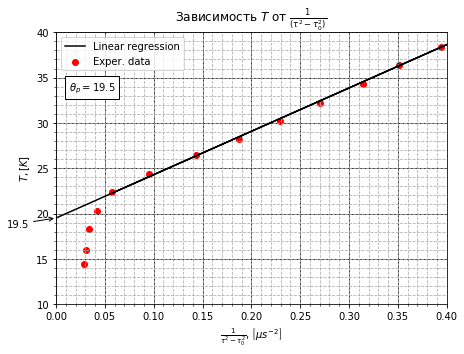

In [13]:
X_line = X[lambda x: x >= 0.05]

# Строим регрессию
regressor = linear_model.LinearRegression()
regressor.fit(X_line.values.reshape(-1, 1), Y[X_line.index].values.reshape(-1, 1))
Y_line = regressor.predict(X_line.values.reshape(-1, 1))
X_line = X_line.append(pd.Series([0]))
Y_line = np.append(Y_line, pd.Series(regressor.intercept_[0]))

f, ax = plt.subplots(figsize=(7, 5))
ax.scatter(X, Y, label='Exper. data', c='r')

ax.plot(X_line, Y_line, label='Linear regression', c='black')
ax.set_title(r'Зависимость $T$ от $\frac{1}{(\tau^2 - \tau_0^2)}$', y=1.02)
ax.set_xlabel(r'$\frac{1}{\tau^2-\tau_0^2}$, $\left[ \mu s^{-2} \right]$')
ax.set_ylabel(r'$T, [K]$')

ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.01))
ax.set_xlim(0, 0.4)
ax.set_ylim(10, 40)
#ax.set_yticks(np.append(ax.get_yticks(), [np.round(regressor.intercept_[0], 2)]))
ax.annotate(round(regressor.intercept_[0], 2), 
            xy=(0, regressor.intercept_[0]), 
            xytext=(-0.05, regressor.intercept_[0]*0.95),
           arrowprops={"facecolor": "black", "arrowstyle":"->",})
ax.grid(True, which='minor', linestyle='--')
ax.grid(True, which='major', c='black', linestyle='-')

f.text(x=0.15, y=0.72, s=r"$\theta _p = {}$".format(round(regressor.intercept_[0], 2)), bbox={"alpha": 1, "facecolor": "white"})
ax.legend()

plt.savefig('out.pdf', fmt='pdf')
plt.show(f)

In [7]:
print("Уголовой коэффициент: {} \nТочка пересечения (константный признак): {}\nСтандартное отклонение: {}".format(regressor.coef_[0][0], regressor.intercept_[0], metrics.mean_squared_error(Y[X_line.index], Y_line)))

Уголовой коэффициент: 47.84504060319342 
Точка пересечения (константный признак): 19.502472547487713
Стандартное отклонение: 2.4361452328865476


### Оригинальное T от \tau

In [8]:
X_or = df.t
Y_or = df['T']

In [9]:
n = 4
w = np.polyfit(X_or, Y_or, deg=n)

def pol(x, w, n):
    return sum([w[n]*x**n for n in range(n+1)])
X_or_pred = np.linspace(min(X_or)*0.999, max(X_or), 5000)
Y_or_pred = [pol(i, w[::-1], n) for i in X_or_pred]

/home/aleksei/.virtualenvs/plots/lib/python3.5/site-packages/ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  


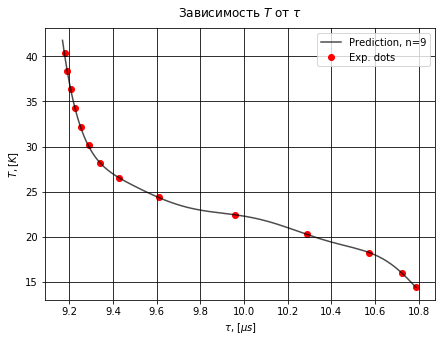

In [10]:
f, ax = plt.subplots(figsize=(7, 5))
ax.scatter(X_or, Y_or, label="Exp. dots", c='r')
colors = ['r', 'g', 'm', 'y', 'c', 'k', 'black']
best = [9]   # НЕ СПРАШИВАЙТЕ, КАК
for n in best:
    w = np.polyfit(X_or, Y_or, deg=n)
    X_or_pred = np.linspace(min(X_or)*0.999, max(X_or), 5000)
    Y_or_pred = [pol(i, w[::-1], n) for i in X_or_pred]
    ax.plot(X_or_pred, Y_or_pred, label="Prediction, n={}".format(n), c=colors[n-3], alpha=0.7)

ax.set_title(r'Зависимость $T$ от $\tau$', y=1.02)
ax.set_xlabel(r'$\tau$, [$\mu s$]')
ax.set_ylabel(r'$T, [K]$')

#ax.yaxis.set_minor_locator(MultipleLocator(1))
#ax.xaxis.set_minor_locator(MultipleLocator(0.025))
#ax.set_xlim(0, 0.4)
#ax.set_yticks(np.append(ax.get_yticks(), [np.round(regressor.intercept_[0], 2)]))
ax.grid(True, which='minor', linestyle='--')
ax.grid(True, which='major', c='black', linestyle='-')

ax.legend()
plt.savefig('out1.pdf', fmt='pdf')
plt.show(f)